# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


daf= pd.read_csv('demo01.csv')


#Lendo 70% das linhas do csv
df = pd.read_csv('demo01.csv', nrows=int(0.7 * sum(1 for line in open('demo01.csv'))))

#Lendo os 30% restantes do csv
total_linhas = sum(1 for line in open('demo01.csv'))
linhas_restantes = total_linhas - int(0.7 * total_linhas)
df_resto = pd.read_csv('demo01.csv', skiprows=range(1, int(0.7 * total_linhas)+1))


print(df_resto)







     sexo posse_de_veiculo posse_de_imovel  qtd_filhos            tipo_renda   
0       M                N               Y           0  Commercial associate  \
1       M                Y               Y           2               Working   
2       M                Y               Y           2               Working   
3       F                N               N           0  Commercial associate   
4       F                N               N           0  Commercial associate   
...   ...              ...             ...         ...                   ...   
4990    F                N               Y           0               Working   
4991    F                N               Y           0  Commercial associate   
4992    M                Y               Y           0               Working   
4993    M                Y               Y           0               Working   
4994    F                N               Y           0             Pensioner   

                           educacao    

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [21]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

data = pd.read_csv('demo01.csv')
X = data[['idade', 'tempo_emprego', 'posse_de_imovel']]

#Convertendo coluna posse_de_imovel em numérico
data_encoded = pd.get_dummies(data, columns=['posse_de_imovel'])

#Alterando a coluna categórica em colunas numéricas usando one-hot encoding
X = data_encoded[['idade', 'tempo_emprego', 'posse_de_imovel_N', 'posse_de_imovel_Y']]

y = ['Aprova' if (idade >= 18 and tempo_emprego >= 2) else 'Reprova' for idade, tempo_emprego in zip(X['idade'], X['tempo_emprego'])]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
#calculado a acuracia 
print("Acurácia:", accuracy)

Acurácia: 1.0


#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

Matriz de Confusão:
[[8020    0]
 [   0 3635]]
Rótulos previstos para a base de teste:
['Aprova' 'Aprova' 'Reprova' ... 'Reprova' 'Aprova' 'Reprova']
Acurácia da base de teste é 1.0


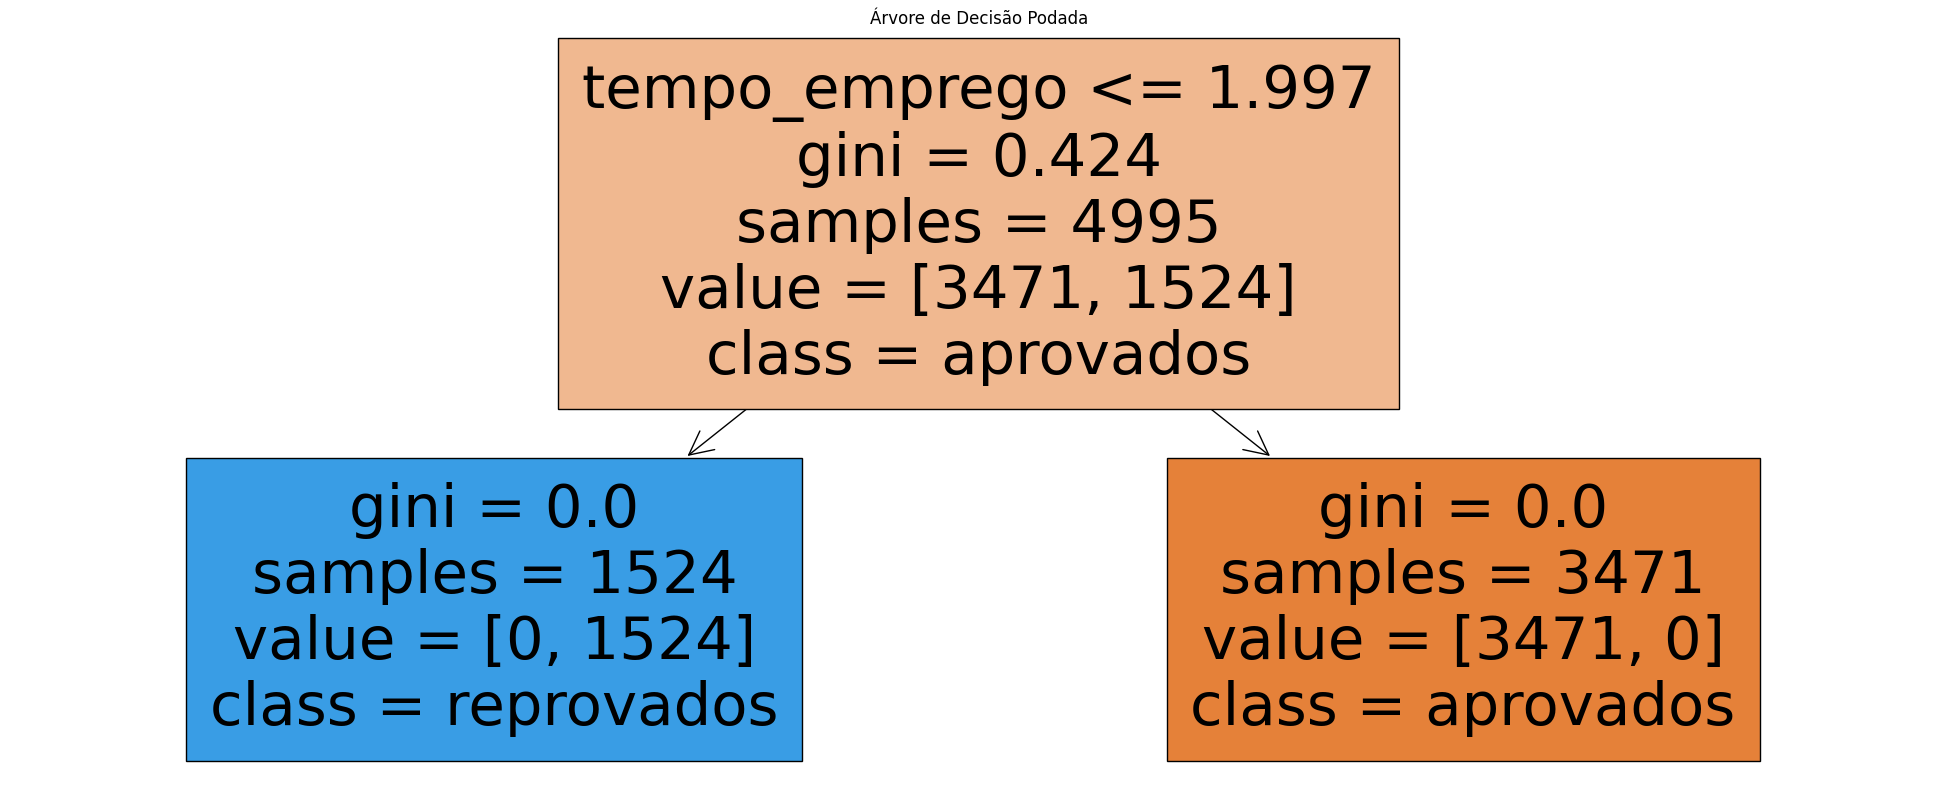

Matriz de Confusão da Árvore Podada:
[[8020    0]
 [   0 3635]]


In [23]:
from sklearn import metrics
from sklearn.tree import plot_tree
from sklearn.metrics import ConfusionMatrixDisplay

# Produzindo a matriz de confusão
cm = metrics.confusion_matrix(y_test, y_pred)
print("Matriz de Confusão:")
print(cm)

# Use o classificador treinado para prever os rótulos da base de teste
y_pred_test = clf.predict(X_test)

# Imprima os rótulos previstos para a base de teste
print("Rótulos previstos para a base de teste:")
print(y_pred_test)

print('Acurácia da base de teste é', metrics.accuracy_score(y_test, y_pred_test))

clf_podada = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)
clf_podada = clf_podada.fit(X_train, y_train)

plt.figure(figsize=(25, 10))
plot_tree(clf_podada, filled=True, class_names=['aprovados', 'reprovados'], feature_names=X.columns)
plt.title('Árvore de Decisão Podada')
plt.show()

cm_podada = metrics.confusion_matrix(y_test, y_pred_test)
print("Matriz de Confusão da Árvore Podada:")
print(cm_podada)